計算多篇文章總分

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.471 seconds.
Prefix dict has been built successfully.


POSITIVE總分 1130
NEGATIVE總分 1663


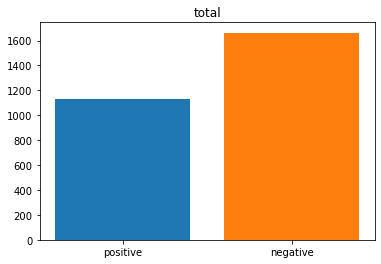

In [1]:
import bs4
import requests
from bs4 import BeautifulSoup
import re
import jieba
t = []
def tag(x):
    r = requests.get(x,cookies = {'over18':'1'})
    soup = BeautifulSoup(r.text,"html.parser")
    sel = soup.select("div.title a")
    for s in sel:
        t.append(s["href"])
        #print(s["href"], s.text)          

content1 = []
def text(y):

    URL = y


    my_headers = {'cookie': 'over18=1;'}


    response = requests.get(URL, headers = my_headers)


   
    soup = bs4.BeautifulSoup(response.text,"html.parser")


    main_container = soup.find(id='main-container')
    # 把所有文字都抓出來
    all_text = main_container.text
    # 把整個內容切割透過 "-- " 切割成2個陣列
    pre_text = all_text.split('--')[0]
    
    # 把每段文字 根據 '\n' 切開
    texts = pre_text.split('\n')
    # 如果你爬多篇你會發現 
    contents = texts[2:]
    # 內容
    content = '\n'.join(contents)
    content1.append(content)
    return content


def replace_all_blank(value):
    """
    去除value中的所有非字母内容，包括标点符号、空格、换行、下划线等
    :param value: 需要处理的内容
    :return: 返回处理后的内容
    """
    # \W 表示匹配非数字字母下划线
    result = re.sub('\W+', '', value).replace("_", '')
    #print(result)
    return result
for i in range(50):
        tag(x = "https://www.ptt.cc/bbs/Gossiping/search?page=" + str(i) + "&q=%E7%A2%BA%E8%A8%BA")
Pscore = 0
Nscore = 0
for i in range(200):
    test = replace_all_blank(text(y="https://www.ptt.cc" + t[i]))
    seg_list = jieba.lcut(test, cut_all=False)

    with open("C:/Users/User/Downloads/chinese_sentiment-master/chinese_sentiment-master/dict/ntusd-negative.txt", encoding='utf-8', mode='r') as f:
        negative = []
        for a in f:
            negative.append(a.strip())
            
    with open("C:/Users/User/Downloads/chinese_sentiment-master/chinese_sentiment-master/dict/ntusd-positive.txt", encoding='utf-8', mode='r') as f:
        positive = []
        for b in f:
            positive.append(b.strip())       
    score=0
    for w in seg_list:
        if w in positive:
            Pscore += 1
        elif w in negative:
            Nscore += 1
        else:
            pass
        
print("POSITIVE總分",Pscore)  
print("NEGATIVE總分",Nscore)

positive = [Pscore]
negative = [Nscore]
import matplotlib.pyplot as plt

plt.title('total')
plt.bar('positive', positive)
plt.bar('negative', negative)
plt.show()